+### Classificação de imagens utilizando fotos de animais

In [3]:
# Bibliotecas utilizadas no código

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import to_categorical

In [2]:
# Célula de verificação de GPU
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Sucesso! O TensorFlow encontrou {len(gpus)} GPU(s):")
    for i, gpu in enumerate(gpus):
        print(f"  - GPU {i}: {gpu.name}")
else:
    print("Aviso: Nenhuma GPU foi encontrada. O TensorFlow usará a CPU.")
    print("Para treinos de imagem, o uso da CPU pode ser muito lento.")

Aviso: Nenhuma GPU foi encontrada. O TensorFlow usará a CPU.
Para treinos de imagem, o uso da CPU pode ser muito lento.


### Pré-Processamento dos dados de imagem

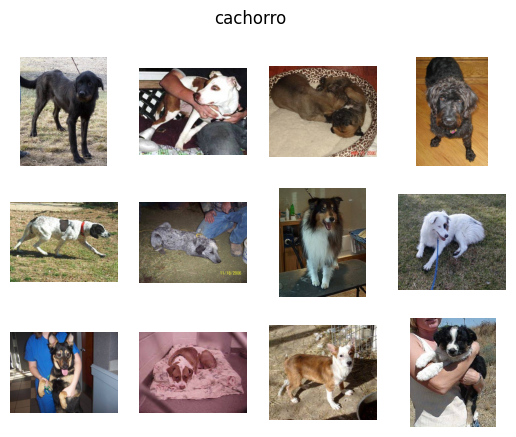

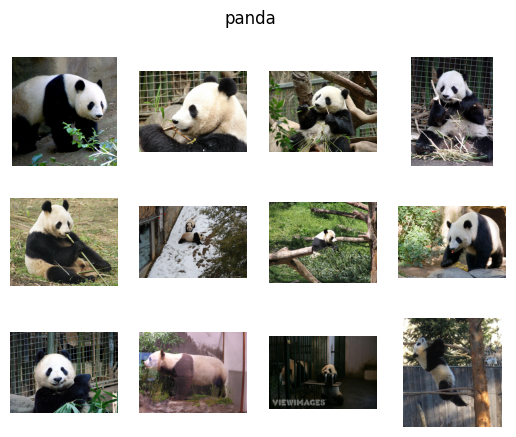

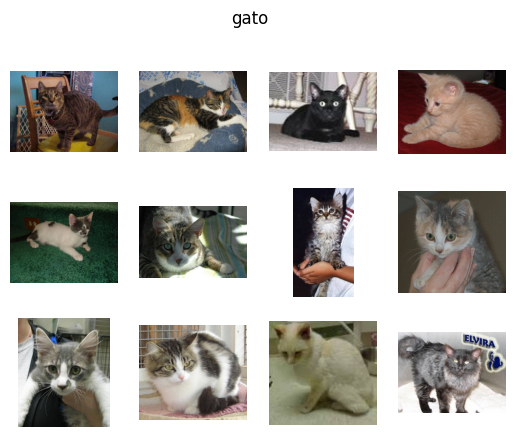

In [2]:
# pasta com as imagens
path = './animals/'

# catogorias dos animais
# cachorro = 0, panda = 1, gato = 2
categories = ['cachorro', 'panda', 'gato']

# Visualizando dados do banco
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

#### 01 - Identificar os tamanhos máximos e mínimos das imagens

In [3]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(f"{category:>10} => altura min : {min(shape0):04} | largura min {min(shape1):04}")
    print(f"{category:>10} => altura max : {max(shape0):04} | largura max {max(shape1):04}")
    shape0 = []
    shape1 = []

  cachorro => altura min : 0050 | largura min 0059
  cachorro => altura max : 0500 | largura max 0500
     panda => altura min : 0087 | largura min 0078
     panda => altura max : 1200 | largura max 1600
      gato => altura min : 0032 | largura min 0055
      gato => altura max : 0500 | largura max 0500


#### 02 - Carregar e Redimensionar imagens para um único tamanho e randomizar o banco

In [4]:
# inicializa as variaveis de dados, categorias e destinos
data = []
labels = []
imagePaths = []
HEIGHT = 50
WIDTH = 50
N_CHANNELS = 3

# ramdomiza as imagens no banco para homogeinizar o teste set
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)
for i in imagePaths[:10]:
    print(i)

# itera sobre todas as imagens
for imagePath in imagePaths:
    # carrega a imagem, redimensiona a imagem para o tamano definido nas variáveis HEIGHT * WIDTH
    # (ignorando a proporção) e armazena a imagem na lista de dados
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extraia o rótulo da classe do caminho da imagem e atualize a lista de labels
    label = imagePath[1]
    labels.append(label)

['./animals/cachorro/dogs_00725.jpg', 0]
['./animals/gato/cats_00477.jpg', 2]
['./animals/cachorro/dogs_00683.jpg', 0]
['./animals/gato/cats_00540.jpg', 2]
['./animals/cachorro/dogs_00043.jpg', 0]
['./animals/cachorro/dogs_00732.jpg', 0]
['./animals/gato/cats_00849.jpg', 2]
['./animals/gato/cats_00488.jpg', 2]
['./animals/gato/cats_00744.jpg', 2]
['./animals/gato/cats_00443.jpg', 2]


#### 03 - Normalizar os canais RGB de 0-255 para 0-1

In [5]:
# dimensionar as intensidades de pixel nas camadas rgb de 0-255 para o intervalo 0-1
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

#### 04 - Avaliar se os dados pre-processados estão de acordo com o idealizado

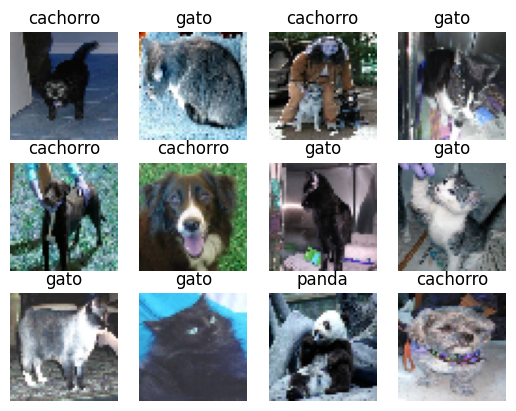

In [6]:
# Vamos verificar se está tudo ok
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

#### 05 - Dividir os dados em Training Set e Test Set

In [7]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.1, random_state=42)

In [8]:
# Preprocess class labels
trainY = to_categorical(trainY, 3)

print("Treinamento x: ", trainX.shape)
print("Treinamento Y: ", trainY.shape)

print("Teste       x: ", testX.shape)
print("Teste       Y: ", testY.shape)

Treinamento x:  (2700, 50, 50, 3)
Treinamento Y:  (2700, 3)
Teste       x:  (300, 50, 50, 3)
Teste       Y:  (300,)


In [1]:
model = Sequential()
model.add(Input(shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(Convolution2D(100, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(100, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

NameError: name 'Sequential' is not defined

In [10]:
model.fit(trainX, trainY, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.4674 - loss: 0.9746
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6418 - loss: 0.7158
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6733 - loss: 0.6317
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6983 - loss: 0.6210
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7526 - loss: 0.5115
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7844 - loss: 0.4757
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.8036 - loss: 0.4470
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8196 - loss: 0.4028
Epoch 9/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8481 - loss: 0.3536
Epoch 10/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8600 - loss: 0.3297
Epoch 11/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8777 - loss: 0.2801
Epoch 12/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy:

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


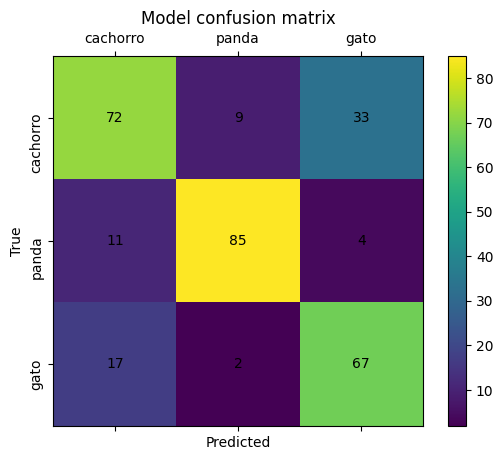

Accuracy : 74.67%


In [12]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score
pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)

#categories = [''] + categories  # Add leading empty string for labels
plt.xticks(range(len(categories)), categories, rotation=0)  # Set tick positions and labels with rotation
plt.yticks(range(len(categories)), categories, rotation=90)  # Set tick positions and labels with rotation
for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [13]:
def carregaImagem(img):
    image = cv2.imread(img)
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    return image

def nomeDoAnimal(label):
    if label==0:
        return "ccachorro"
    if label==1:
        return "panda"
    if label==2:
        return "gato"
    
def classificarAnimal(file):
    ar=carregaImagem(file)
    ar=ar/255
    label=1
    a=[]
    a.append(ar)
    a=np.array(a)
    score=model.predict(a,verbose=1)
    print(score)
    label_index=np.argmax(score)
    print(label_index)
    acc=np.max(score)
    animal=nomeDoAnimal(label_index)
    print(animal)
    print("A imagem foi classificada como '"+animal+"' com uma accurácia de = "+str(acc))

In [14]:
classificarAnimal("./animals/gato/cats_00009.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[4.1174978e-02 9.5732023e-05 9.5872927e-01]]
2
gato
A imagem foi classificada como 'gato' com uma accurácia de = 0.95872927
